In [37]:
import pandas as pd
df = pd.read_csv("NBA_2017_regularGames.csv",parse_dates=["Date"])

In [38]:
df.head(2)

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Notes
0,2016-10-25,7:30 pm,New York Knicks,88,Cleveland Cavaliers,117,Box Score,NaN,NaN
1,2016-10-25,10:30 pm,San Antonio Spurs,129,Golden State Warriors,100,Box Score,NaN,NaN


In [39]:
df.columns = ["Date","Time","Visitor Team","Visitor Points","Home Team","Home Points","Score Type","Extra Time","Notes"]

In [40]:
df.head(2)

,Date,Time,Visitor Team,Visitor Points,Home Team,Home Points,Score Type,Extra Time,Notes
0,2016-10-25,7:30 pm,New York Knicks,88,Cleveland Cavaliers,117,Box Score,NaN,NaN
1,2016-10-25,10:30 pm,San Antonio Spurs,129,Golden State Warriors,100,Box Score,NaN,NaN


In [47]:
print(df['Visitor Points'].mean())



104.01626016260163


In [49]:
df["Home Team Win"] = df["Visitor Points"] < df["Home Points"]

In [50]:
print("Home Team Win percentage: {0:.1f}%".format(100 * df["Home Team Win"].sum() / df["Home Team Win"].count()))

Home Team Win percentage: 58.4%


In [146]:
y = df["HomeTeamWin"].values

In [147]:
y

array([ True, False,  True, ...,  True, False,  True])

In [53]:
standing = pd.read_csv("ExapandedStanding.csv")

In [104]:
df["Home Last Win"] = False
df=df.rename(columns = {'Home Team Win':'HomeTeamWin'})
df["Visitor Last Win"] = False
from collections import defaultdict
won_last = defaultdict(int)
for index, row in df.iterrows():
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    row["Home Last Win"] = won_last[home_team]
    row["Visitor Last Win"] = won_last[visitor_team]
    df.ix[index] = row
    #We then set our dictionary with the each team's result (from this row) for the next
    #time we see these teams.
    #Set current Win
    won_last[home_team] = row["HomeTeamWin"]
    won_last[visitor_team] = not row["HomeTeamWin"]

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


In [55]:
#Which team won their last encounter

df["Home Win Streak"] = 0
df["Visitor Win Streak"] = 0
win_streak = defaultdict(int)

for index, row in df.iterrows():
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    row["Home Win Streak"] = win_streak[home_team]
    row["Visitor Win Streak"] = win_streak[visitor_team]
    df.ix[index] = row    
    # Set current win
    if row["HomeTeamWin"]:
        win_streak[home_team] += 1
        win_streak[visitor_team] = 0
    else:
        win_streak[home_team] = 0
        win_streak[visitor_team] += 1

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


In [96]:
# The standing of the team
df["HomeTeamRankHigher"] = 0
for index , row in df.iterrows():
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    home_rank = standing[standing["Team"] == home_team]["Rk"].values[0]
    visitor_rank = standing[standing["Team"] == visitor_team]["Rk"].values[0]
    row["HomeTeamRankHigher"] = int(home_rank > visitor_rank)
    df.ix[index] = row

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [60]:
# Which team won their last encounter team regardless of playing at home
last_match_winner = defaultdict(int)
df["Home Team Won Last"] = 0
for index , row in df.iterrows():
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    teams = tuple(sorted([home_team, visitor_team]))
    
    row["Home Team Won Last"] = 1 if last_match_winner[teams] == row["Home Team"] else 0
    df.ix[index] = row
    # Who won this one?
    winner = row["Home Team"] if row["Home Team Win"] else row["Visitor Team"]
    last_match_winner[teams] = winner

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


In [70]:
df.head()

,Date,Time,Visitor Team,Visitor Points,Home Team,Home Points,Score Type,Extra Time,Notes,Home Team Win,Home Last Win,Visitor Last Win,Home Win Streak,Visitor Win Streak,Home Team Ranks Higher,Home Team Won Last
0,2016-10-25,7:30 pm,New York Knicks,88,Cleveland Cavaliers,117,Box Score,NaN,NaN,True,0,0,0,0,0,0
1,2016-10-25,10:30 pm,San Antonio Spurs,129,Golden State Warriors,100,Box Score,NaN,NaN,False,0,0,0,0,0,0
2,2016-10-25,10:00 pm,Utah Jazz,104,Portland Trail Blazers,113,Box Score,NaN,NaN,True,0,0,0,0,0,0
3,2016-10-26,7:30 pm,Brooklyn Nets,117,Boston Celtics,122,Box Score,NaN,NaN,True,0,0,0,0,0,0
4,2016-10-26,7:00 pm,Dallas Mavericks,121,Indiana Pacers,130,Box Score,OT,NaN,True,0,0,0,0,0,0


1.0


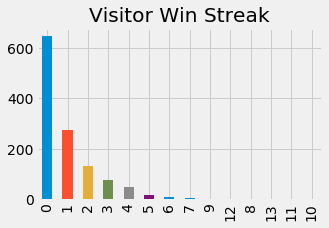

In [115]:
print(df['Home Win Streak'].median())

import seaborn as sns
import matplotlib.pyplot as plt

# This allows plots to appear directly in the notebook.
%matplotlib inline
plt.style.use('fivethirtyeight')
#df1 = df[['Home Team Ranks Higher', 'HomeTeamWin']]


fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)


# Plot accidents depending on type
#plt.subplot2grid(fig_dims, (0, 0))
#df['HomeTeamRankHigher'].value_counts().plot(kind='bar', 
 #                                    title='Home Team Ranks Higher')
#plt.subplot2grid(fig_dims, (0, 1))
#df['HomeTeamWin'].value_counts().plot(kind='bar', 
              #                       title='Home Team Win')
#plt.subplot2grid(fig_dims, (1, 0))
#df['Home Win Streak'].value_counts().plot(kind='bar', 
#                                     title='Home Win Streak')
plt.subplot2grid(fig_dims, (1, 1))
df['Visitor Win Streak'].value_counts().plot(kind='bar', 
                                     title='Visitor Win Streak')

No handles with labels found to put in legend.


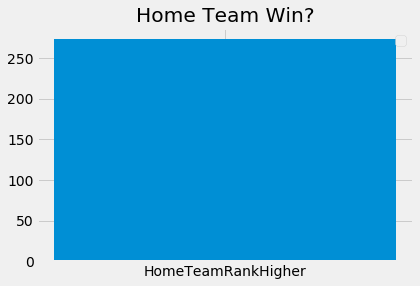

In [110]:
df2 = {}
columns = ['HomeTeamRankHigher']
for col in columns:
    df2[col] = np.sum(df.HomeTeamWin[df[col] == 1])
df2.pop('Home Team Ranks Higher', None)
plt.bar(range(len(df2)), df2.values(), align='center')
plt.xticks(range(len(df2)), df2.keys())
plt.title("Home Team Win?")
plt.legend(loc='best')
plt.show()

In [148]:
features = df[['Home Win Streak', 'Visitor Win Streak', 'HomeTeamRankHigher']].values

In [152]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=10)


from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, features, y, scoring='accuracy')


print("Scores:", scores, "\n")
print("Accuracy:", np.mean(scores))

Scores: [0.62287105 0.58536585 0.58190709] 

Accuracy: 0.5967146634505983


/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [150]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoding = LabelEncoder()
#We will fit this transformer to the home teams so that it learns an integer
#representation for each team
encoding.fit(df["Home Team"].values)

home_teams = encoding.transform(df["Home Team"].values)
visitor_teams = encoding.transform(df["Visitor Team"].values)
X_teams = np.vstack([home_teams, visitor_teams]).T

#we use the OneHotEncoder transformer to encode 

onehot = OneHotEncoder()
#We fit and transform 
X_teams = onehot.fit_transform(X_teams).todense()

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [153]:
all_features = np.hstack([features, X_teams])

#we run the decision tree on the new dataset
classifier = DecisionTreeClassifier(random_state=10)
scores = cross_val_score(classifier, all_features, y, scoring='accuracy')
print("Accuracy:", np.mean(scores))

Accuracy: 0.560954039037294


/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [154]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics

small = df[['HomeTeamRankHigher', 'Home Win Streak']]
train, test, train_labels, test_labels  =   train_test_split(X_small, y, test_size=.4)

In [168]:
classifier=DecisionTreeClassifier()
classifier=classifier.fit(train,train_labels)
preds=classifier.predict(test)
sklearn.metrics.confusion_matrix(test_labels,preds)
sklearn.metrics.accuracy_score(test_labels, preds)
print("Accuracy: ", sklearn.metrics.accuracy_score(test_labels, preds))

Accuracy:  0.5873983739837398


Accuracy:  0.5873983739837398


In [169]:
#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)

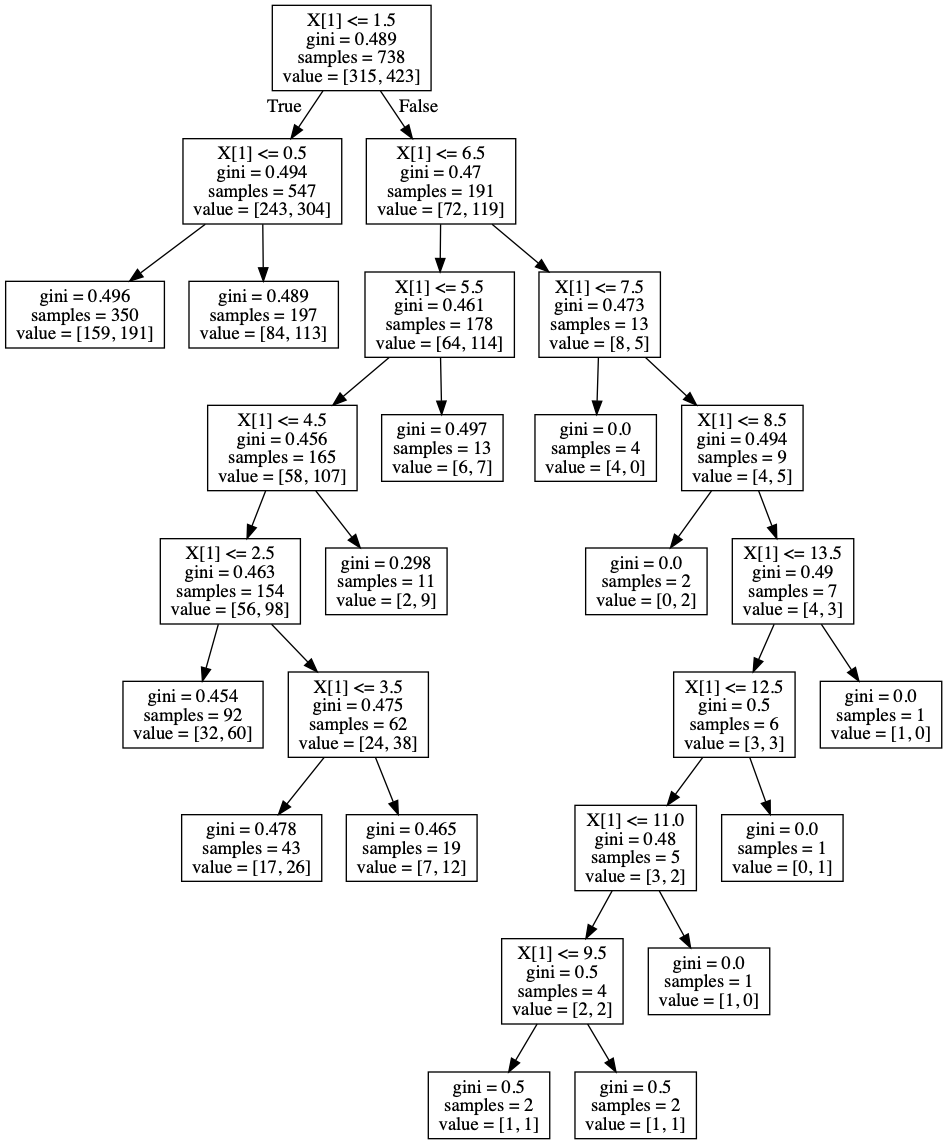

In [170]:
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

In [172]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=10)
scores = cross_val_score(classifier, all_features, y, scoring='accuracy')
print("Accuracy:", np.mean(scores))

Accuracy: 0.5756001798591684


/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20

In [175]:
from sklearn.model_selection import GridSearchCV
a = {
"max_features": [2, 10, 'auto'],
"n_estimators": [100,],
"criterion": ["gini", "entropy"],
"min_samples_leaf": [2, 4, 6],
}
classifier = RandomForestClassifier(random_state=10)
grid = GridSearchCV(classifier, a)
grid.fit(all_features, y)
print("Accuracy:", grid.best_score_)

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy: 0.6455284552845528


In [35]:
print(grid.best_estimator_)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=14, verbose=0, warm_start=False)


In [177]:
from sklearn.naive_bayes import GaussianNB

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels.ravel())

In [178]:
from sklearn.metrics import accuracy_score


# Evaluate accuracy
print(accuracy_score(test_labels, preds))



0.5873983739837398
